In [1]:
%load_ext autoreload
%autoreload 2 

In [12]:
import torch
from sqnet import SQNet
import numpy as np
from utils import solve_crocoddyl, random_array, griddata
from data import solver_norms, solver_grads
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
net = torch.load('valuenet.pth')

In [14]:
# x can be set to any constant between -2, 2
x = 1.5
y = np.linspace(-1., 1., 100)
xtest = np.array([ [x,x2, 0.] for x2 in y ])

In [15]:
def network_grads(net, xtest):
    cost = net(torch.tensor(xtest, dtype=torch.float32)).detach().numpy().reshape(-1,1)
    
    
    states = torch.tensor(xtest, dtype=torch.float32)
    
    grads = net.jacobian(states).numpy()
    grads1 = net.hessian(states).numpy()
        
    
    return cost, grads, grads1

In [16]:
cost_p, grad1_p, grad2_p = network_grads(net, xtest)

In [17]:
cost, grad1, grad2 = solver_grads(xtest)

In [18]:
grad2_p_11 = []
for h in grad2_p:
    grad2_p_11.append(np.diagonal(h)[1])


In [19]:
grad2_p = []
for h in grad2:
    grad2_p.append(np.diagonal(h)[1])

In [20]:
cost = cost.numpy()
grad1 = grad1.numpy()
grad2 = grad2.numpy()

Text(0.5, 1.0, 'Vxx[11]')

<Figure size 432x288 with 0 Axes>

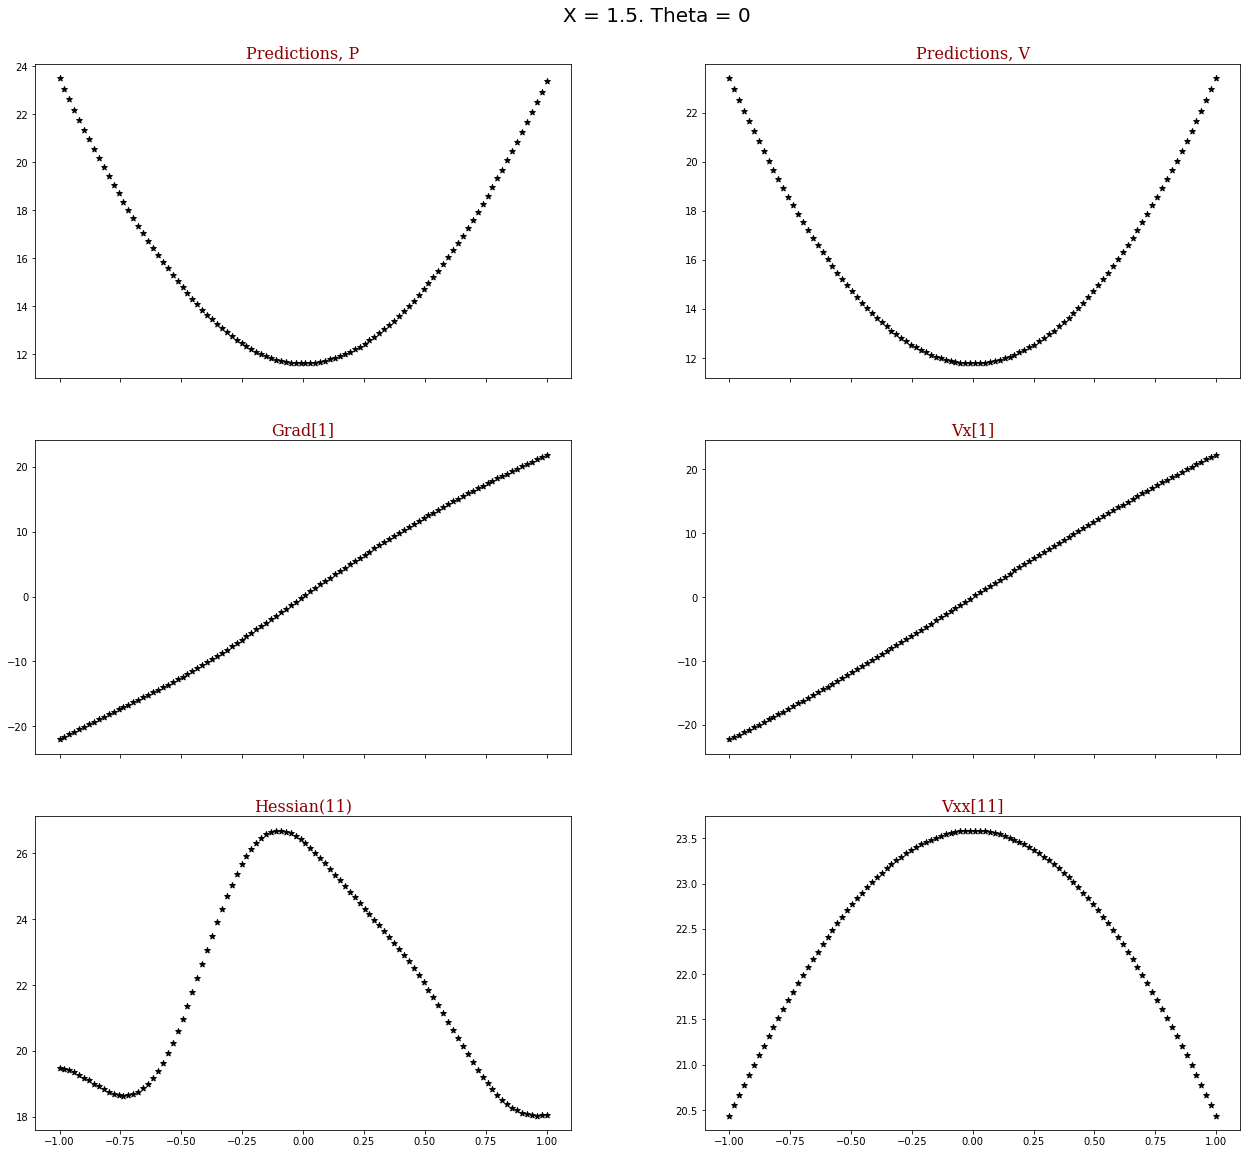

In [21]:
plt.clf()

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
# Make the figure:

fig, axs = plt.subplots(3, 2, figsize=(18, 20), sharex=True)
fig.subplots_adjust(left=0.02, bottom=0.2, right=0.95, top=0.94, wspace=0.25)
fig.suptitle(f"X = {x}. Theta = 0", fontsize = 20)
# Plot prediction, cost
im1 = axs[0, 0].scatter(xtest[:,1], cost_p, c = 'black', marker = "*")
im2 = axs[0, 1].scatter(xtest[:,1], cost, c = 'black', marker = "*")



im3 = axs[1, 0].scatter(xtest[:,1], grad1_p[:,1], c = 'black', marker = "*")
im4 = axs[1, 1].scatter(xtest[:,1], grad1[:,1], c = 'black', marker = "*")


im5 = axs[2, 0].scatter(xtest[:,1], grad2_p_11, c = 'black', marker = "*")
im6 = axs[2, 1].scatter(xtest[:,1], grad2_p, c = 'black', marker = "*")





# Set titles
axs[0, 0].set_title("Predictions, P", fontdict=font)
axs[0, 1].set_title("Predictions, V", fontdict=font)

axs[1, 0].set_title("Grad[1]", fontdict=font)
axs[1, 1].set_title("Vx[1]", fontdict=font)
axs[2, 0].set_title("Hessian(11)", fontdict=font)
axs[2, 1].set_title("Vxx[11]", fontdict=font)

